# 1. Setup

In [ ]:
# Install Dependencies
!pip install tensorflow tensorflow-gpu opencv-python matplotlib
!pip list

In [1]:
# Imports
import tensorflow as tf
import os

2023-08-29 09:36:21.881755: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 09:36:21.907091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 09:36:28.597664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [140]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Prepare images

In [4]:
# Imports
import cv2
import imghdr

/tmp/ipykernel_855338/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [141]:
data_dir = 'data/UoA-DR/' # IMAGES DOWNLOADED FROM https://figshare.com/s/5011cb600c8bdbc941f1?file=10741045

image_exts = ['jpeg','jpg', 'bmp', 'png']

classes_dict = {  #  X and Y pairs outlined in https://figshare.com/s/5011cb600c8bdbc941f1?file=10910012
    "NPDR": {*range(1, 82), *range(83, 95), 130, *range(132, 144), *range(168, 170), *range(171, 175), 179, 193},
    "PDR": {82, *range(95, 101), 131, 167, *range(176, 179), *range(182, 193), *range(194, 201)},
    "Healthy": {*range(101, 130), *range(144, 167), 170, 175, *range(180, 182)}
}

# Function to check if a string contains only digits and ends with '.jpg'
def is_retinal_only(file_name):
    return file_name[:-4].isdigit() and file_name.endswith(".jpg")

# Function to find the class of an image given its full filename
def find_class(file_name):
    image_number = file_name[:-4]
    
    for image_class, value_set in classes_dict.items():
        if int(image_number) in value_set:
            print(f"The associated key for {image_number} is: {image_class}")
            break
    else:
        print(f"No associated key found for {image_number}")
    
    return image_class
    
# Create the new folder if it doesn't exist
for image_class in classes_dict.keys():
    new_folder = os.path.join(data_dir, image_class)
    os.makedirs(new_folder, exist_ok=True)

# Modify the data_dir so its is in the tree struction of data_dir -> image_class -> image
for image_folder in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_folder)):
        if is_retinal_only(image):
            image_class = find_class(image)

            # Move the image to the new folder
            original_image_path = os.path.join(data_dir, image_folder, image)
            new_image_path = os.path.join(data_dir, image_class, image)
            os.rename(original_image_path, new_image_path)
            
            print("Original Path:", original_image_path)
            print("New Path:", new_image_path)

The associated key for 147 is: Healthy
Original Path: data/UoA-DR/Healthy/147.jpg
New Path: data/UoA-DR/Healthy/147.jpg
The associated key for 127 is: Healthy
Original Path: data/UoA-DR/Healthy/127.jpg
New Path: data/UoA-DR/Healthy/127.jpg
The associated key for 102 is: Healthy
Original Path: data/UoA-DR/Healthy/102.jpg
New Path: data/UoA-DR/Healthy/102.jpg
The associated key for 110 is: Healthy
Original Path: data/UoA-DR/Healthy/110.jpg
New Path: data/UoA-DR/Healthy/110.jpg
The associated key for 166 is: Healthy
Original Path: data/UoA-DR/Healthy/166.jpg
New Path: data/UoA-DR/Healthy/166.jpg
The associated key for 108 is: Healthy
Original Path: data/UoA-DR/Healthy/108.jpg
New Path: data/UoA-DR/Healthy/108.jpg
The associated key for 163 is: Healthy
Original Path: data/UoA-DR/Healthy/163.jpg
New Path: data/UoA-DR/Healthy/163.jpg
The associated key for 170 is: Healthy
Original Path: data/UoA-DR/Healthy/170.jpg
New Path: data/UoA-DR/Healthy/170.jpg
The associated key for 148 is: Healthy
O

In [142]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        print(image_path)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

print(img.shape)

data/UoA-DR/Healthy/147.jpg
data/UoA-DR/Healthy/127.jpg
data/UoA-DR/Healthy/102.jpg
data/UoA-DR/Healthy/110.jpg
data/UoA-DR/Healthy/166.jpg
data/UoA-DR/Healthy/108.jpg
data/UoA-DR/Healthy/163.jpg
data/UoA-DR/Healthy/170.jpg
data/UoA-DR/Healthy/148.jpg
data/UoA-DR/Healthy/145.jpg
data/UoA-DR/Healthy/161.jpg
data/UoA-DR/Healthy/181.jpg
data/UoA-DR/Healthy/175.jpg
data/UoA-DR/Healthy/103.jpg
data/UoA-DR/Healthy/116.jpg
data/UoA-DR/Healthy/154.jpg
data/UoA-DR/Healthy/146.jpg
data/UoA-DR/Healthy/125.jpg
data/UoA-DR/Healthy/160.jpg
data/UoA-DR/Healthy/121.jpg
data/UoA-DR/Healthy/118.jpg
data/UoA-DR/Healthy/152.jpg
data/UoA-DR/Healthy/106.jpg
data/UoA-DR/Healthy/101.jpg
data/UoA-DR/Healthy/151.jpg
data/UoA-DR/Healthy/107.jpg
data/UoA-DR/Healthy/122.jpg
data/UoA-DR/Healthy/105.jpg
data/UoA-DR/Healthy/156.jpg
data/UoA-DR/Healthy/119.jpg
data/UoA-DR/Healthy/144.jpg
data/UoA-DR/Healthy/104.jpg
data/UoA-DR/Healthy/124.jpg
data/UoA-DR/Healthy/149.jpg
data/UoA-DR/Healthy/150.jpg
data/UoA-DR/Healthy/

# 3. Load Data

In [85]:
# Imports
import numpy as np
from matplotlib import pyplot as plt

In [163]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, labels='inferred') #TODO check if any data was loss, as it says 199 files instead of 200
data_iterator = data.as_numpy_iterator() # convert to an iterator as the data is a a generator 
batch = data_iterator.next() # contains X INPUT and Y EXPECTED OUTPUTS
x, y = batch
print(x.shape) # X INPUT, batch of 32 images of size 256*256 in 3 dimsension colour
print(y) # Y OUTPUT, batch of 32 labels. 

len(data.file_paths)
data.file_paths

Found 199 files belonging to 3 classes.
(32, 256, 256, 3)
[1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 2 0 2 2 0 2 1 1 1 0 0 1 2]


['data/UoA-DR/NPDR/9.jpg',
 'data/UoA-DR/NPDR/143.jpg',
 'data/UoA-DR/PDR/194.jpg',
 'data/UoA-DR/NPDR/140.jpg',
 'data/UoA-DR/NPDR/172.jpg',
 'data/UoA-DR/NPDR/74.jpg',
 'data/UoA-DR/NPDR/20.jpg',
 'data/UoA-DR/NPDR/30.jpg',
 'data/UoA-DR/NPDR/76.jpg',
 'data/UoA-DR/NPDR/141.jpg',
 'data/UoA-DR/PDR/192.jpg',
 'data/UoA-DR/NPDR/70.jpg',
 'data/UoA-DR/NPDR/15.jpg',
 'data/UoA-DR/PDR/186.jpg',
 'data/UoA-DR/NPDR/174.jpg',
 'data/UoA-DR/NPDR/75.jpg',
 'data/UoA-DR/Healthy/120.jpg',
 'data/UoA-DR/NPDR/79.jpg',
 'data/UoA-DR/Healthy/105.jpg',
 'data/UoA-DR/Healthy/113.jpg',
 'data/UoA-DR/PDR/100.jpg',
 'data/UoA-DR/Healthy/153.jpg',
 'data/UoA-DR/NPDR/31.jpg',
 'data/UoA-DR/Healthy/127.jpg',
 'data/UoA-DR/NPDR/132.jpg',
 'data/UoA-DR/NPDR/14.jpg',
 'data/UoA-DR/NPDR/32.jpg',
 'data/UoA-DR/Healthy/164.jpg',
 'data/UoA-DR/NPDR/142.jpg',
 'data/UoA-DR/NPDR/53.jpg',
 'data/UoA-DR/Healthy/124.jpg',
 'data/UoA-DR/NPDR/179.jpg',
 'data/UoA-DR/PDR/177.jpg',
 'data/UoA-DR/NPDR/1.jpg',
 'data/UoA-DR/

['Healthy', 'NPDR', 'PDR']
[1 1 0 1 1 2 1 1 1 0 1 0 1 0 1 2 1 0 0 1 1 1 0 1 0 2 1 2 1 1 1 1]
Filename: data/UoA-DR/NPDR/20.jpg
Filename: data/UoA-DR/PDR/100.jpg
Filename: data/UoA-DR/NPDR/3.jpg
Filename: data/UoA-DR/PDR/200.jpg


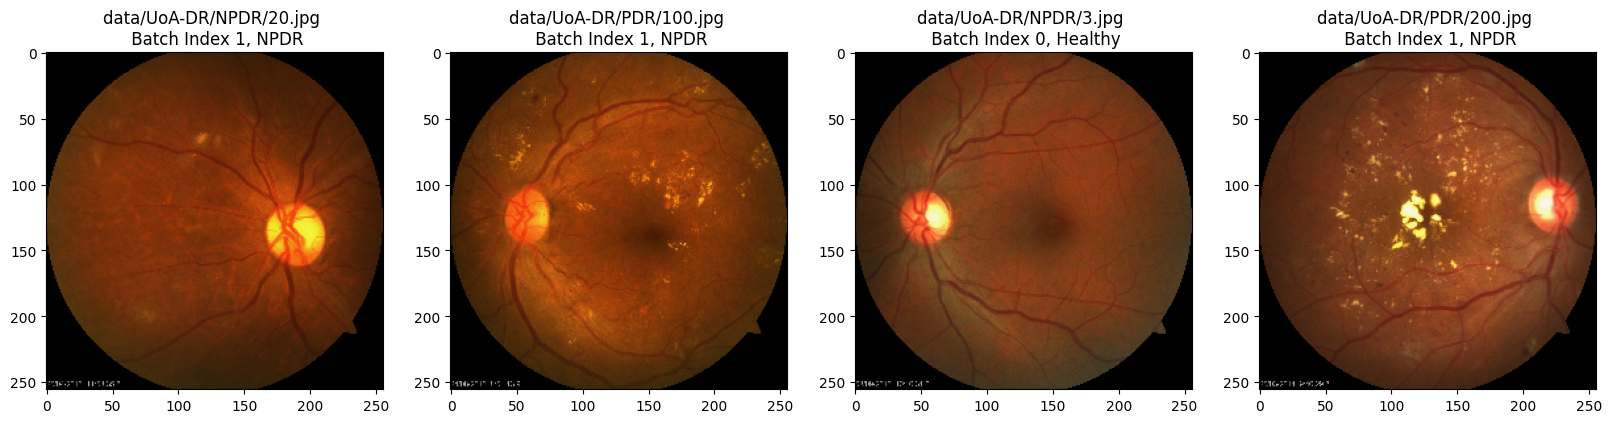

In [144]:
class_labels = data.class_names  # Get the class labels
print(class_labels)
print(y)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

    y_index = y[idx]
    image_class = class_labels[y_index]
    # image_filename = os.path.basename(data.file_paths[y_index])
    # file_path = os.path.join(data_dir, image_class, image_filename)
    # print("File Path:", file_path)

    # Get the filename using the index and dataset's file_paths attribute
    filename = data.file_paths[idx]
    print("Filename:", filename)

    # Set the title with class label and batch index
    title = f"{filename} \n Batch Index {y_index}, {image_class}"
    ax[idx].set_title(title)



plt.show()

['Healthy', 'NPDR', 'PDR']


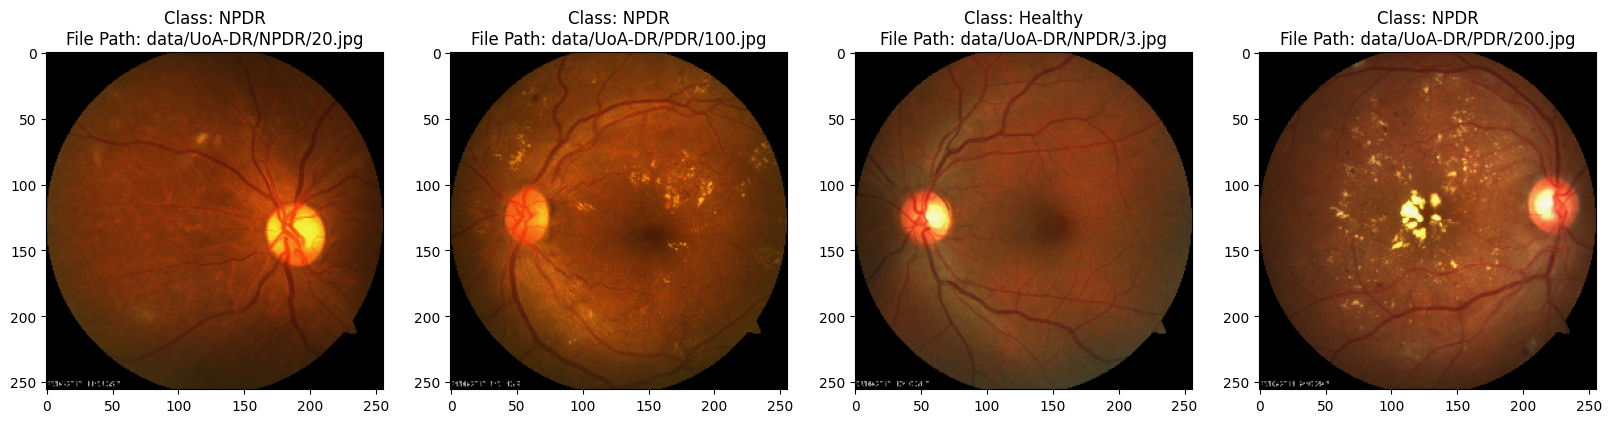

In [149]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

print(class_labels)

for idx, img in enumerate(batch[0][:4]):
    class_index = batch[1][idx]
    class_name = class_labels[class_index]  # Get the class name from class_labels

    image_filename = os.path.basename(data.file_paths[idx])
    file_path = data.file_paths[idx]

    ax[idx].imshow(img.astype(int))
    ax[idx].set_title(f"Class: {class_name}\nFile Path: {file_path}")

plt.show()


0
1
2
3


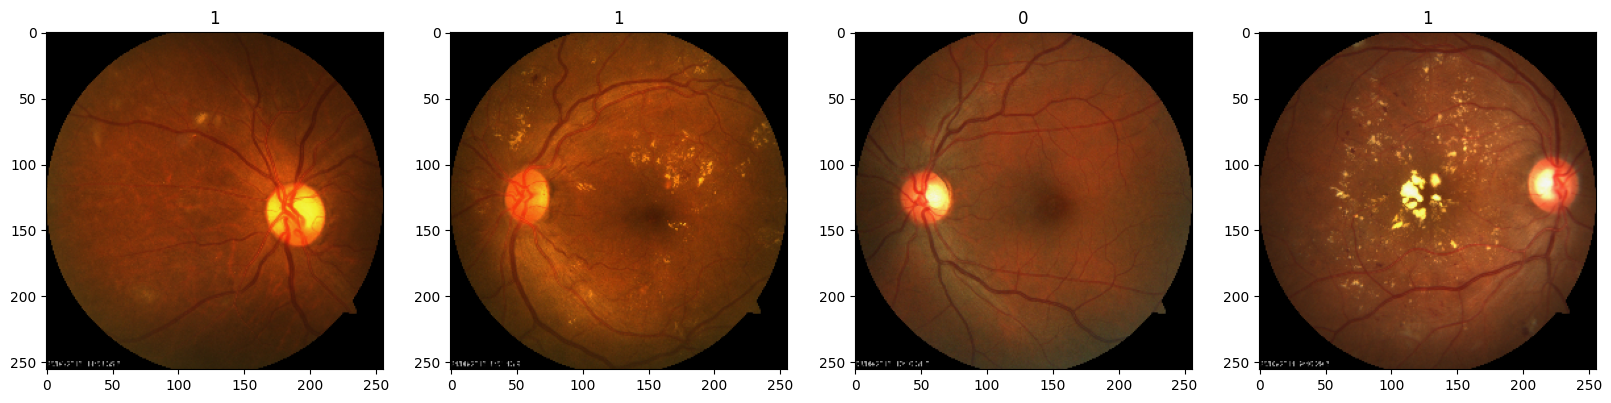

In [145]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    print(idx)
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [164]:
scaled = x/255
print(scaled.max())
print(scaled.min())

mapped = data.map(lambda x, y: (x/255, y)).as_numpy_iterator().next()
print(mapped[0])
print(mapped[1])

0.99707556
0.0
[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.01537894 0.01537894 0.01537894]
   [0.06817698 0.06817698 0.06817698]
   [0.00618873 0.00618873 0.00618873]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00249885 0.00249885 0.00

In [165]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [173]:
batch[0].min()

0.0

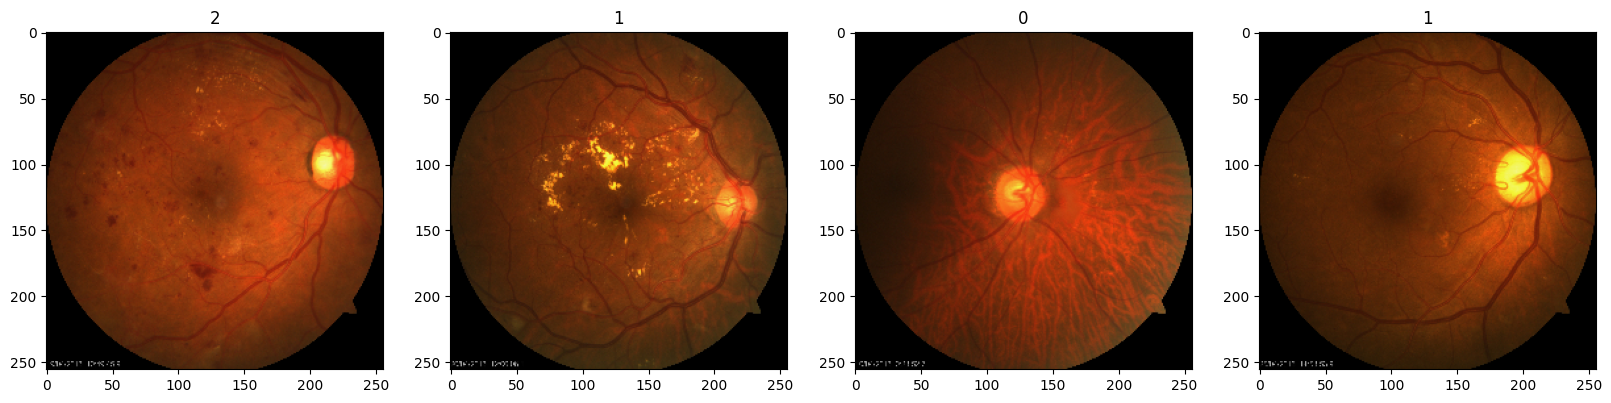

In [174]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [181]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) + 1
test_size = int(len(data)*.1) + 1

In [183]:
print(train_size, val_size, test_size)
print(train_size + val_size + test_size == len(data))

4 2 1
True


In [184]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [46]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [185]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [186]:
model = Sequential() # TODO update to ResNet

In [187]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [188]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [189]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Train

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-08-29 10:57:52.142901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-29 10:57:52.948254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-29 10:57:53.154069: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdaa48cb860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-29 10:57:53.154115: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-08-29 10:57:53.163943: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-29 10:57:53.239592: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

4/4 [==============================] - 5s 234ms/step - loss: 0.6599 - accuracy: 0.5391 - val_loss: 0.8391 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 1s 214ms/step - loss: 0.3676 - accuracy: 0.6250 - val_loss: 0.2590 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 1s 205ms/step - loss: 0.3989 - accuracy: 0.5703 - val_loss: 0.5268 - val_accuracy: 0.4062
Epoch 4/20
4/4 [==============================] - 1s 212ms/step - loss: 0.2998 - accuracy: 0.5547 - val_loss: 0.2744 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 1s 204ms/step - loss: 0.2096 - accuracy: 0.5781 - val_loss: 0.0205 - val_accuracy: 0.5312
Epoch 6/20
4/4 [==============================] - 1s 194ms/step - loss: 0.2660 - accuracy: 0.6094 - val_loss: 0.5648 - val_accuracy: 0.5312
Epoch 7/20
4/4 [==============================] - 1s 206ms/step - loss: 0.2560 - accuracy: 0.6719 - val_loss: -0.5617 - val_accuracy: 0.6250
Epoch 8/20
4/4 [==============

In [55]:
print("TensorFlow GPU available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
TensorFlow GPU available: True


2023-08-29 10:58:36.125525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 10:58:36.125664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 10:58:36.125716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# 8. Plot Performance

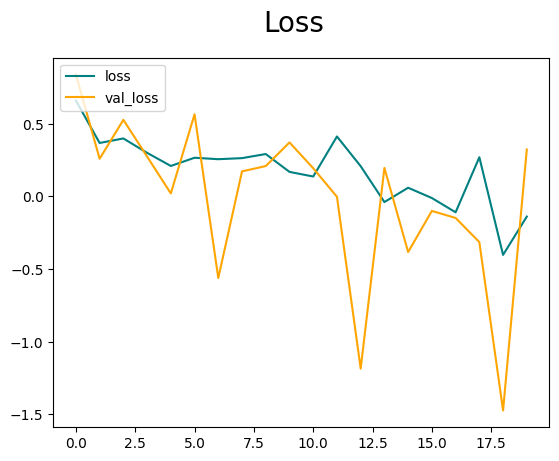

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

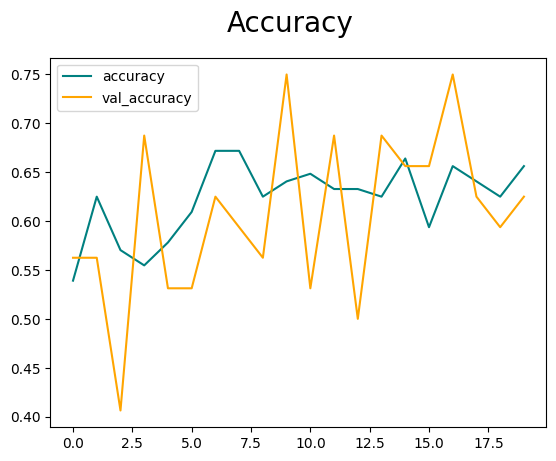

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [61]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [62]:
import cv2

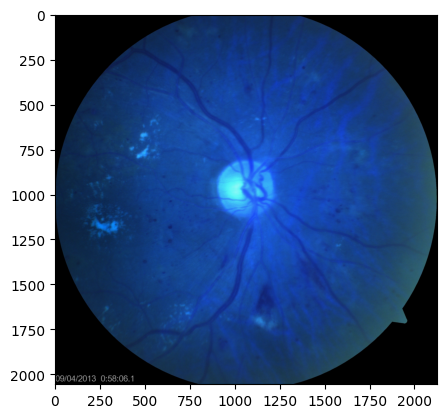

In [63]:
img = cv2.imread('./1.jpg')
plt.imshow(img)
plt.show()

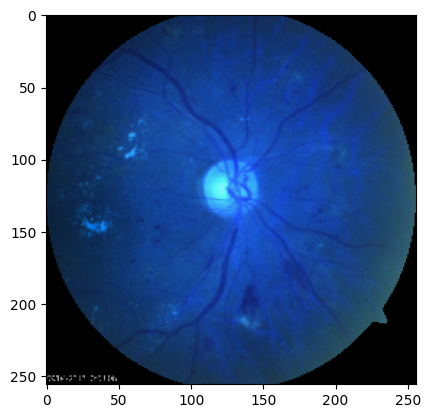

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


In [66]:
yhat

array([[0.00272147]], dtype=float32)

In [67]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','imageclassifier.h5'))

/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
new_model = load_model('./models/imageclassifier.h5')

In [68]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


array([[0.22750142]], dtype=float32)